<h1>Machine learning</h1>
<li>Creating programs that learn
<li>The "learned" knowledge is not explicitly contained in the program
<li>The program is designed to learn using <b><span style="color:darkred">real world data</span></b>

<h2>Basic ideas</h2>
<li>The program contains a learning algorithm
<li>The program is given data
<li>The program applies the learning algorithm to the data and figures stuff out!

<h2>Terminology</h2>
<li><span style="color:darkblue">Feature</span>: A (measurable) property of the learning domain
<li><span style="color:darkblue">Feature set</span>: The set of features that are useful for learning in a given domain and a given problem
<ul>
<li>gender, age, income, other demographic data for predicting credit risk
<li>position of pupil, size of nose, presence/absence of dimples in facial data for facial recognition
<li>color, intensity of pixels in image data for image recognition
<li>moving averages, departures, technical indicators, price in stock price prediction
</ul>
<li><span style="color:darkblue">Input features</span>: The observable (useful) features in the domain
<li><span style="color:darkblue">Output features</span>: A feature that is being learned or predicted
<ul>
<li>In stock price prediction: moving averages, departures, technical indicators may be input features and the future return the output feature
<li>In face recognition: various observable facial features are the input feature and the person (name?) the output feature
</ul>
<li><span style="color:darkblue">Independent variables</span>: Synonymous with input feature, used in statistical learning
<li><span style="color:darkblue">Dependent variables</span>: Synonymous with output feature in prediction problems


<h2>Types of learning</h2>
<li><span style="color:darkblue">Supervised learning</span>: The data set contains paired input and output features and the machine learns how to get the output from the given input. In supervised learning, both input as well as output features are used in learning
<li><span style="color:darkblue">Unsupervised learning</span>: The data set contains features and the machine tries to induce concepts or knowledge from this feature set. Typically by organizing the data into "like" clusters. In unsupervised learning, only input features are used in learning

<h1>Examples of machine learning algorithms</h1>
<li><span style="color:darkblue">Regression</span>: The machine learns a mathematical relationship between the input and output features. Regression is a supervised learning technique
<li><span style="color:darkblue">Classification and regression trees (CART)</span>: The machine learns a set of rules that relate the input and output features. CART is a supervised learning technique
<li><span style="color:darkblue">Clustering</span>: Clustering algorithms group the input feature set into "like" groups, usually using a distance metric. Clustering algorithms are unsupervised learning techniques
<li><span style="color:darkblue">Neural networks</span>: Used for "deep learning". Designed to mimic the brain, neural networks are directed, weighted, multi-layered graphs. The first layer is an input layer that corresponds to the input feature set and the final layer is an output layer that corresponds to the output feature set. The graph contains one or more hidden layers and uses an algorithm to compute the weights on the edges to learn the relationship between input and output features. Neural networks are supervised learning techniques 

<h1>Machine learning using Regression</h1>
<li>The machine learns a mathematical relationship between the input feature set and output feature values
<li>All data must be numerical
<li>There is an implied sequence in both independent variable values as well as dependent variable values


<h3>Types of regression</h3>
<span style="color:darkblue">Linear regression</span>: Learns a mathematical linear relationship between input and output values
<li>Linear regression fits a line to the data
<li>Single output values
<li>Estimates a function of the form:$$ y = { \alpha + \beta_1}x_1 + {\beta_2}x_2 + ..... + {\beta_n}x_n + {\epsilon} $$
<li>The x values are independent variables
<li>The y value is the dependent variable
<li>The alpha is a constant intercept term
<li>The betas are the feature weights
<li>The epsilon is an error term


<span style="color:darkblue">Logistic regression</span><li>Predicts a categorical dependent variable value
<li>Binomial logistic regression predicts two category values (0 or 1)
<li>Typically, the function predicts:
<ul> <li>1 if $$ { \alpha + \beta_1}x_1 + {\epsilon} > 0 $$
<li>0 otherwise

<h1>Classification using regression</h1>
<li>sklearn has a logistic regression package but
<li>we will use linear regression to predict binomial categories
<li>because it is richer for analysis
<li>And examine some of the ways in which we evaluate our ML result


<h3>The data</h3>
<li>Rocks vs Mines (https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-dat)
<li>Though the data is about underwater mines, imagine:
<ol>
<li>You're looking out at a number of fields that have rock like objects strewn all over the place
<li>Some of those objects are actually mines
<li>You have special mine detecting equipment 
<li>The equipment sends sound waves at different frequencies, the waves hit the objects, and report back some sort of measurements
<li>Lucky (for you), you have prior sonar data along with whether a rock like object was a rock or a mine 
<li>You can use this to get your "machine" to learn how to identify rocks and mines
<li>And then test the results by sending your army across the field - and get an estimate of what it will cost you!

<h2>Read the data</h2>

<h3>Data set 1: Rocks vs. Mines</h3>
<li>Independent variables: sonar soundings at different frequencies
<li>Dependent variable (target): Rock or Mine

In [5]:
import pandas as pd
from pandas import DataFrame
url="https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
df = pd.read_csv(url,header=None)
df.describe()

0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9      ...              50  \
count  208.000000  208.000000  208.000000  208.000000     ...      208.000000   
mean     0.121747    0.134799    0.178003    0.208259     ...        0.016069   
std      0.061788    0.085152    0.118387    0.134416     ...        0.012008   
min      0.003300    0.005500    0.007500    0.011300     ...        0.000000   
25%      0.080900    0.080425    0.097025    0.111275     ...        0.008425   
50%      0.106950    0.112100    0.152250    0.182400     ...        0.013900   
75%      0.154000    0.169600    0.233425    0.268700     ...        0.020825   
max      0.372900    0.459000    0.682800    0.710600     ...        0.100400   

               51          52          53          54          55          56  \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.013420    0.010709    0.010941    0.009290    0.008222    0.007820   
std      0.009634    0.007060    0.007301    0.007088    0.005736    0.005785   
min      0.000800    0.000500    0.001000    0.000600    0.000400    0.000300   
25%      0.007275    0.005075    0.005375    0.004150    0.004400    0.003700   
50%      0.011400    0.009550    0.009300    0.007500    0.006850    0.005950   
75%      0.016725    0.014900    0.014500    0.012100    0.010575    0.010425   
max      0.070900    0.039000    0.035200    0.044700    0.039400    0.035500   

               57          58          59  
count  208.000000  208.000000  208.000000  
mean     0.007949    0.007941    0.006507  
std      0.006470    0.006181    0.005031  
min      0.000300    0.000100    0.000600  
25%      0.003600    0.003675    0.003100  
50%      0.005800    0.006400    0.005300  
75%      0.010350    0.010325    0.008525  
max      0.044000    0.036400    0.043900  

[8 rows x 60 columns]

In [7]:
df.iloc[0]

0       0.02
1     0.0371
2     0.0428
3     0.0207
4     0.0954
5     0.0986
6     0.1539
7     0.1601
8     0.3109
9     0.2111
10    0.1609
11    0.1582
12    0.2238
13    0.0645
14     0.066
15    0.2273
16      0.31
17    0.2999
18    0.5078
19    0.4797
20    0.5783
21    0.5071
22    0.4328
23     0.555
24    0.6711
25    0.6415
26    0.7104
27     0.808
28    0.6791
29    0.3857
       ...  
31    0.2604
32    0.5121
33    0.7547
34    0.8537
35    0.8507
36    0.6692
37    0.6097
38    0.4943
39    0.2744
40     0.051
41    0.2834
42    0.2825
43    0.4256
44    0.2641
45    0.1386
46    0.1051
47    0.1343
48    0.0383
49    0.0324
50    0.0232
51    0.0027
52    0.0065
53    0.0159
54    0.0072
55    0.0167
56     0.018
57    0.0084
58     0.009
59    0.0032
60         R
Name: 0, Length: 61, dtype: object

<h4>The data</h4>
<li>60 float64 columns. These are the sonar readings and will form our <span style="color:blue">feature set</span>
<li>One object column. This will be our target/output/dependent variable

<h2>Generate a few summary statistics</h2>

<h4>See all columns</h4>

In [6]:
pd.options.display.max_columns=70
df.describe()

0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9           10          11  \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.121747    0.134799    0.178003    0.208259    0.236013    0.250221   
std      0.061788    0.085152    0.118387    0.134416    0.132705    0.140072   
min      0.003300    0.005500    0.007500    0.011300    0.028900    0.023600   
25%      0.080900    0.080425    0.097025    0.111275    0.129250    0.133475   
50%      0.106950    0.112100    0.152250    0.182400    0.224800    0.249050   
75%      0.154000    0.169600    0.233425    0.268700    0.301650    0.331250   
max      0.372900    0.459000    0.682800    0.710600    0.734200    0.706000   

               12          13          14          15          16          17  \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.273305    0.296568    0.320201    0.378487    0.415983    0.452318   
std      0.140962    0.164474    0.205427    0.232650    0.263677    0.261529   
min      0.018400    0.027300    0.003100    0.016200    0.034900    0.037500   
25%      0.166125    0.175175    0.164625    0.196300    0.205850    0.242075   
50%      0.263950    0.281100    0.281700    0.304700    0.308400    0.368300   
75%      0.351250    0.386175    0.452925    0.535725    0.659425    0.679050   
max      0.713100    0.997000    1.000000    0.998800    1.000000    1.000000   

               18          19          20          21          22          23  \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.504812    0.563047    0.609060    0.624275    0.646975    0.672654   
std      0.257988    0.262653    0.257818    0.255883    0.250175    0.239116   
min      0.049400    0.065600    0.051200    0.021900    0.056300    0.023900   
25%      0.299075    0.350625    0.399725    0.406925    0.450225    0.540725   
50%      0.434950    0.542500    0.617700    0.664900    0.699700    0.698500   
75%      0.731400    0.809325    0.816975    0.831975    0.848575    0.872175   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               24          25          26          27          28          29  \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.675424    0.699866    0.702155    0.694024    0.642074    0.580928   
std      0.244926    0.237228    0.245657    0.237189    0.240250    0.220749   
min      0.024000    0.092100    0.048100    0.028400    0.014400    0.061300   
25%      0.525800    0.544175    0.531900    0.534775    0.463700    0.411400   
50%      0.721100    0.754500    0.745600    0.731900    0.680800    0.607150   
75%      0.873725    0.893800    0.917100    0.900275    0.852125    0.735175   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               30          31          32          33          34          35  \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.504475    0.439040    0.417220    0.403233    0.392571    0.384848   
std      0.213992    0.213237    0.206513    0.231242    0.259132    0.264121   
min      0.048200    0.040400    0.047700

<h4>Examine the distribution of the data in column 4</h4>

<li>Quartile 1: from .0067 to .03805
<li>Quartile 2: from .03805 to .0625
<li>Quartile 3: from .0625 to .100275
<li>Quartile 4: from .100275 to .401

<h4>Quartile 4 is much larger than the other quartiles. This raises the possibility of outliers</h4>

<h4> A Quantile - Quantile (qq) plot can help identify outliers</h4>
<li>y-axis contains values
<li>x-axis is the cumulative normal density function plotted as a straight line (-3 to +3)
<li>y-axis is the values ordered from lowest to highest
<li>the closer the curve is to the line, the more it reflects a normal distribution

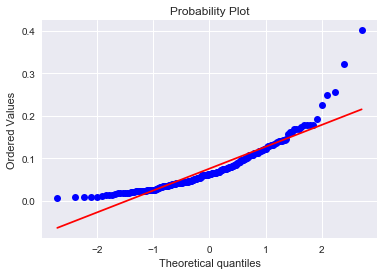

In [8]:
import numpy as np 
import pylab 
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('seaborn')
%matplotlib inline
   
stats.probplot(df[4], dist="norm", plot=pylab)
pylab.show() 
# this plots the standard deviations of the normalized data

<h4>Examine the dependent variable</h4>

In [9]:
df[60].unique()

array(['R', 'M'], dtype=object)

<h4>Examine correlations</h4>

In [10]:
df.corr()

0         1         2         3         4         5         6   \
0   1.000000  0.735896  0.571537  0.491438  0.344797  0.238921  0.260815   
1   0.735896  1.000000  0.779916  0.606684  0.419669  0.332329  0.279040   
2   0.571537  0.779916  1.000000  0.781786  0.546141  0.346275  0.190434   
3   0.491438  0.606684  0.781786  1.000000  0.726943  0.352805  0.246440   
4   0.344797  0.419669  0.546141  0.726943  1.000000  0.597053  0.335422   
5   0.238921  0.332329  0.346275  0.352805  0.597053  1.000000  0.702889   
6   0.260815  0.279040  0.190434  0.246440  0.335422  0.702889  1.000000   
7   0.355523  0.334615  0.237884  0.246742  0.204006  0.471683  0.675774   
8   0.353420  0.316733  0.252691  0.247078  0.177906  0.327578  0.470580   
9   0.318276  0.270782  0.219637  0.237769  0.183219  0.288621  0.425448   
10  0.344058  0.297065  0.274610  0.271881  0.231684  0.333570  0.396588   
11  0.210861  0.194102  0.214807  0.175381  0.211657  0.344451  0.274432   
12  0.210722  0.249596  0.258767  0.215754  0.299086  0.411107  0.365391   
13  0.256278  0.273170  0.291724  0.286708  0.359062  0.396233  0.409576   
14  0.304878  0.307599  0.285663  0.278529  0.318059  0.367908  0.411692   
15  0.239079  0.261844  0.237017  0.248245  0.328725  0.353783  0.363086   
16  0.137845  0.152170  0.201093  0.223203  0.326477  0.293190  0.250024   
17  0.041817  0.042870  0.120587  0.194992  0.299266  0.235778  0.208057   
18  0.055227  0.040911  0.099303  0.189405  0.340543  0.226305  0.215495   
19  0.156760  0.102428  0.103117  0.188317  0.285737  0.206841  0.196496   
20  0.117663  0.075255  0.063990  0.142271  0.205088  0.174768  0.165827   
21 -0.056973 -0.074157 -0.026815  0.036010  0.152897  0.123770  0.063773   
22 -0.163426 -0.179365 -0.073400 -0.029749  0.073934  0.064081  0.009359   
23 -0.218093 -0.196469 -0.085380 -0.102975 -0.000624  0.027026  0.011982   
24 -0.295683 -0.295302 -0.214256 -0.206673 -0.067296 -0.043280 -0.057147   
25 -0.342865 -0.365749 -0.291974 -0.291357 -0.125675 -0.100309 -0.126074   
26 -0.341703 -0.337046 -0.263111 -0.294749 -0.169618 -0.129094 -0.179526   
27 -0.224340 -0.234386 -0.256674 -0.256074 -0.214692 -0.118645 -0.116848   
28 -0.199099 -0.228490 -0.290728 -0.300476 -0.283863 -0.156081 -0.129694   
29 -0.077430 -0.115301 -0.197493 -0.236602 -0.273350 -0.151186 -0.068142   
30 -0.048370 -0.055862 -0.106198 -0.190086 -0.214336 -0.054136 -0.096945   
31 -0.030444 -0.049683 -0.109895 -0.169987 -0.173485 -0.051934 -0.115871   
32 -0.031939 -0.108272 -0.170671 -0.164651 -0.200586 -0.144391 -0.127052   
33  0.031319 -0.004247 -0.099409 -0.083965 -0.140559 -0.070337 -0.077662   
34  0.098118  0.115824  0.017053  0.015200 -0.086529 -0.028815 -0.015531   
35  0.080722  0.132611  0.053070  0.039282 -0.073481 -0.023621  0.002979   
36  0.119565  0.169186  0.107530  0.063486 -0.064617 -0.064798 -0.001376   
37  0.209873  0.217494  0.130276  0.089887 -0.008620 -0.048745  0.065900   
38  0.208371  0.186828  0.110499  0.089346  0.063408  0.030599  0.080942   
39  0.099993  0.098350  0.074137  0.045141  0.061616  0.081119  0.112673   
40  0.127313  0.188226  0.189047  0.145241  0.098832  0.075797  0.041071   
41  0.213592  0.261345  0.233442  0.144693  0.125181  0.048763 -0.028720   
42  0.206057  0.186368  0.113920  0.050629  0.063706  0.034380 -0.025727   
43  0.157949  0.133018  0.071946 -0.008407  0.031575  0.048870  0.061404   
44  0.279968  0.285716  0.180734  0.087824  0.089202  0.085468  0.110813   
45  0.319354  0.304247  0.173649  0.080012  0.081964  0.029524  0.076537   
46  0.230343  0.255797  0.179528  0.046109  0.041419  0.016640  0.098925   
47  0.203234  0.265279  0.234896  0.121065  0.084435  0.067196  0.155221   
48  0.247560  0.313995  0.223074  0.133294  0.088128  0.080729  0.194720   
49  0.269287  0.245868  0.081096  0.077925  0.066751  0.017300  0.166112   
50  0.254450  0.320538  0.238110  0.174676  0.115936  0.171767  0.184152   
51  0.355299  0.434548  0.394076  0.374651  0.266617  0.25

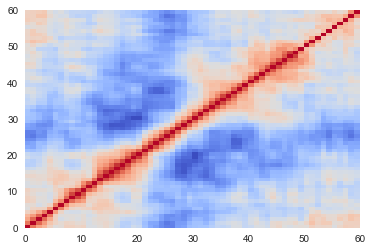

In [11]:
import matplotlib.pyplot as plot
plot.pcolor(df.corr(),cmap='coolwarm') #https://matplotlib.org/examples/color/colormaps_reference.html
plot.show() # more correlated near center of line where the best fit lies

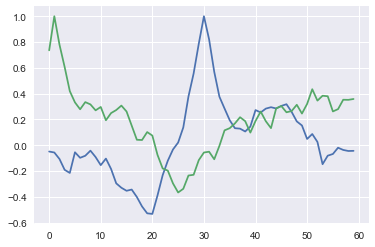

In [18]:
df.corr()[30].plot()
df.corr()[1].plot()
# examine the correlations of a specific column to the others

<h4>Highly correlated items = not good!</h4>
<h4>Low correlated items = good </h4>
<h4>Correlations with target (dv) = good (high predictive power)</h4>

<h2>Training a classifier on Rocks vs Mines</h2>
<li><span style="color:blue">scikit-learn</span>: A Python machine learning library
<li>!pip install sklearn --upgrade
<li>Make sure you have the latest version!

In [ ]:
# !pip install sklearn --upgrade

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline
url="https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
df = pd.read_csv(url,header=None)
df.describe()

0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9           10          11  \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.121747    0.134799    0.178003    0.208259    0.236013    0.250221   
std      0.061788    0.085152    0.118387    0.134416    0.132705    0.140072   
min      0.003300    0.005500    0.007500    0.011300    0.028900    0.023600   
25%      0.080900    0.080425    0.097025    0.111275    0.129250    0.133475   
50%      0.106950    0.112100    0.152250    0.182400    0.224800    0.249050   
75%      0.154000    0.169600    0.233425    0.268700    0.301650    0.331250   
max      0.372900    0.459000    0.682800    0.710600    0.734200    0.706000   

               12          13          14          15          16          17  \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.273305    0.296568    0.320201    0.378487    0.415983    0.452318   
std      0.140962    0.164474    0.205427    0.232650    0.263677    0.261529   
min      0.018400    0.027300    0.003100    0.016200    0.034900    0.037500   
25%      0.166125    0.175175    0.164625    0.196300    0.205850    0.242075   
50%      0.263950    0.281100    0.281700    0.304700    0.308400    0.368300   
75%      0.351250    0.386175    0.452925    0.535725    0.659425    0.679050   
max      0.713100    0.997000    1.000000    0.998800    1.000000    1.000000   

               18          19          20          21          22          23  \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.504812    0.563047    0.609060    0.624275    0.646975    0.672654   
std      0.257988    0.262653    0.257818    0.255883    0.250175    0.239116   
min      0.049400    0.065600    0.051200    0.021900    0.056300    0.023900   
25%      0.299075    0.350625    0.399725    0.406925    0.450225    0.540725   
50%      0.434950    0.542500    0.617700    0.664900    0.699700    0.698500   
75%      0.731400    0.809325    0.816975    0.831975    0.848575    0.872175   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               24          25          26          27          28          29  \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.675424    0.699866    0.702155    0.694024    0.642074    0.580928   
std      0.244926    0.237228    0.245657    0.237189    0.240250    0.220749   
min      0.024000    0.092100    0.048100    0.028400    0.014400    0.061300   
25%      0.525800    0.544175    0.531900    0.534775    0.463700    0.411400   
50%      0.721100    0.754500    0.745600    0.731900    0.680800    0.607150   
75%      0.873725    0.893800    0.917100    0.900275    0.852125    0.735175   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               30          31          32          33          34          35  \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.504475    0.439040    0.417220    0.403233    0.392571    0.384848   
std      0.213992    0.213237    0.206513    0.231242    0.259132    0.264121   
min      0.048200    0.040400    0.047700

<h4>Convert labels R and M to 0 and 1</h4>

In [19]:
df[60]=np.where(df[60]=='R',0,1)

<h2>Training and testing</h2>
<li><span style="color:blue">Training dataset</span>: The model is "fit" using a training sample
<li><span style="color:blue">Testing dataset</span>: The "fitted" model is evaluated on a testing sample
<li><span style="color:blue">validation dataset</span>: Sometimes, a dataset is used to "fine tune" model parameters after training but before testing

<li>We'll use a training and testing dataset
<li>And separate out the feature set and target value for each dataset

In [20]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.3)
x_train = train.iloc[0:,0:60] # all columns expect the last
y_train = train[60]
x_test = test.iloc[0:,0:60]
y_test = test[60]
y_train

101    1
161    1
154    1
202    1
88     0
126    1
206    1
80     0
79     0
143    1
56     0
107    1
147    1
39     0
155    1
169    1
59     0
105    1
99     1
180    1
130    1
70     0
188    1
122    1
177    1
162    1
50     0
163    1
93     0
94     0
      ..
127    1
187    1
20     0
160    1
195    1
57     0
193    1
156    1
22     0
141    1
196    1
29     0
167    1
43     0
124    1
84     0
111    1
7      0
26     0
139    1
87     0
81     0
61     0
34     0
102    1
3      0
10     0
175    1
172    1
12     0
Name: 60, Length: 145, dtype: int32

<h2>Build the model and fit the training data</h2>
<li>The linear regression package is in sklearn's linear_model library
<li>We create a linear regression model object
<li>And give it our training data to "fit" the model

In [21]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)
# show the RMSE ?

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<h3>Get predictions</h3>
<li>Our predictions can be interpreted as "probabilities" that the predicted value is 1 (a mine)
<li>We can decide on a "threshold" value that assigns either a 1 or a 0 to each test case

In [22]:
testing_predictions  = model.predict(x_test)
testing_predictions

array([ 0.6141669 ,  0.21461435,  0.27967727,  0.20025533,  1.05587057,
        0.25850315,  0.10083488,  0.85542831,  0.90208654,  0.54147794,
        0.48030076,  0.45586926,  0.88284444,  0.40435614,  0.23166203,
        0.7879387 ,  0.25506187,  0.67086784,  0.79343503,  0.21902562,
       -0.03312292,  0.48959972,  0.96058587,  0.42760801,  0.28635008,
        0.32025798,  1.26687217,  0.0496741 ,  0.71277211,  1.41744855,
       -0.06293245, -0.05802864, -0.1152152 ,  1.81307905,  0.76058193,
       -0.00283957,  0.07693915,  0.4387247 ,  0.24147962,  0.94874188,
       -0.13282391,  0.77159523,  1.06532317,  0.288728  ,  0.641451  ,
        1.44792057,  0.06738248,  0.12745033,  0.36591452,  0.14235083,
        0.44809588,  0.80506905,  0.49099686,  0.47506686, -0.22520888,
        0.7022143 ,  0.11772786,  0.77236092,  1.5670747 ,  1.04392729,
       -0.01922701,  1.17532079,  0.00259797])

In [23]:
def get_classification(predictions,threshold):
    classes = np.zeros_like(testing_predictions)
    for i in range(len(classes)):
        if predictions[i] > threshold:
            classes[i] = 1
    return classes

get_classification(testing_predictions,0.5)

array([1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0.])

<h2>Evaluating the model</h2>
<li><b>Confusion matrices</b>

<h3>Confusion matrix and the threshold</h3>
<li>A confusion matrix evaluates each data point in the testing dataset to see which of the following categories it falls into: 
<ol>
<li><span style="color:blue">true positive</span>: model predicts a mine (1) and it is a mine
<li><span style="color:blue">false positive</span>: model predicts a mine but it is a rock (0)
<li><span style="color:blue">true negative</span>: model predicts a rock and it is a rock
<li><span style="color:blue">false negative</span>: model predicts a rock and it is actually a mine
</ol>
<li>It then reports the number (or proportion) of cases in each category

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,get_classification(testing_predictions,0.5))

array([[24,  7],
       [13, 19]], dtype=int64)

In [27]:
tn, fp, fn, tp = confusion_matrix(y_test,get_classification(testing_predictions,0.5)).ravel()
print(tn, fp, fn, tp)

24 7 13 19


<h3>Confusion matrix metrics</h3>
Using the results of the confusion matrix, we can calculate a number of metrics that will help evaluate the model
<ol>
<li><span style="color:blue">true positive rate</span> or <span style="color:blue">sensitivity</span> or <span style="color:blue">recall</span>
<li><span style="color:blue">true negative rate</span> or <span style="color:blue">specificity</span>
<li><span style="color:blue">false positive rate</span> or <span style="color:blue">fall out</span>
<li><span style="color:blue">precision</span> or <span style="color:blue">positive predictive value</span>
<li><span style="color:blue">f-score</span>
<li><span style="color:blue">accuracy</span>
<li><span style="color:blue">misclassification rate</span>


</ol>

<h3>True Positive rate/sensitivity/recall</h3>
True Positive Rate is the proportion of positive cases that are correctly identified as positive
$$ tpr = \frac{tp}{(tp + fn)} $$
Sensitivity is a measure of how good our model is in identifying the positive condition. A value of 1, for example, will mean that every positive value (every mine) was correctly idenfified by the model. 
<li>Percentage of persons with a disease correctly identified as having that disease
<li>Percentage of "fake news" items correctly identified as fake news
<li>Percentage of consumers who will click on an ad
<li>Percentage of customers who will move to a new cell phone carrier at the end of their contract

In [28]:
tpr = tp/(tp+fn)
print("Percentage of mines correctly identified as mines:",tpr)

Percentage of mines correctly identified as mines: 0.59375


<h3>True Negative Rate or Specificity</h3>
True Negative Rate is the proportion of negative cases that are correctly identified as negative
$$ tpr = \frac{tn}{(tn + fp)} $$
<li>Proportion of real news stories that are correctly identified as real news
<li>Proportion of healthy people that are correctly identified as healthy


In [29]:
tnr = tn/(tn+fp)
print(tnr)

0.7741935483870968


<h3>false positive rate or "fall out"</h3>
The false positive rate is the proportion of rocks that have been identified as mines
$$ fpr = \frac{fp}{(fp + tn)} $$

<li>Proportion of true news items that are identified as fake news
<li>Proportion of consumers who won't use a discount but are identified as target discount users
<li>Proportion of rocks that have been identified as mines

In [30]:
fpr = fp/(fp+tn)
print(fpr)

0.22580645161290322


<h3>Precision</h3>
Precision measures the proportion of cases identified as positive that are actually positive
$$ precision = \frac{tp}{(tp + fp)} $$
<li>Proportion of news items that are actually fake from amongst all the news items that are identified as fake
<li>Proportion of "churners" that are actual churners from amongst all customers identifed as churners
<li>Proportion of actual mines amongst all things that are identified as mines

In [31]:
precision = tp/(tp+fp)
print(precision)

0.7307692307692307


<h3>f-score</h3>
<li>Precision tells us how well our model discriminates amongst cases it identifies as positive. A precision of 1 would mean that if our model says something is positive, it is definitely a positive. 
<li>Recall tells us how good the model is at finding positives (a recall of 1 would mean it has found all positives). <li>Precision does not tell us how good we are at finding positives while recall does not tell us how good our model is at disciminating
<li>The f-score combines the two into a single score
$$ F = 2\frac{precision * recall}{(precision + recall)} $$


In [32]:
f = precision*tpr/(precision+tpr)*2
print(f)

0.6551724137931033


<h3>accuracy</h3>
Accuracy measures how accurately the model classifies things as positive or negative (mines or rocks)
$$accuracy = \frac{tp + tn}{(tp+tn+fp+fn)} $$
An accuracy of 1 would mean that our model has classified everything correctly

In [ ]:
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(accuracy)

<h3>misclassification rate</h3>
Misclassifican rate is the inverse of accuracy. What proportion of the cases are misclassified?
$$ misclassificationRate = \frac{fp + fn}{(tp+tn+fp+fn)} $$


In [33]:
misclassification_rate = (fp + fn)/(tp+fp+tn+fn)
print(misclassification_rate)

0.31746031746031744


<h3>Examining our results</h3>


In [34]:
def c_m_analysis(true,pred,threshold):
    tn, fp, fn, tp = confusion_matrix(true,get_classification(pred,threshold)).ravel()
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    fpr = fp/(fp+tn)
    f_score = 2*precision*tpr/(precision+tpr)
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    print("Precision:\t\t\t%1.2f identified as mines are mines"%(precision))
    print("Recall/TPR:\t\t\t%1.2f proportion of actual mines identified"%(recall))
    print("False Positive Rate:\t\t%1.2f proportion of rocks identified as mines"%fpr)
    print("f-score:\t\t\t%1.2f tradeoff between precision and recall"%(f_score))
    print("Accuracy:\t\t\t%1.2f how well the model has classified"%(accuracy))

c_m_analysis(y_test,testing_predictions,0.5)

Precision:			0.73 identified as mines are mines
Recall/TPR:			0.59 proportion of actual mines identified
False Positive Rate:		0.23 proportion of rocks identified as mines
f-score:			0.66 tradeoff between precision and recall
Accuracy:			0.68 how well the model has classified


<h3>Threshold</h3>
<li>Our (regression) model is calculating continuous values between 0 and 1
<li>We're using a threshold of 0.5 to decide whether something is a rock or a mine
<li>What happens if we use a different threshold value?

In [35]:
c_m_analysis(y_test,testing_predictions,0.25)

Precision:			0.69 identified as mines are mines
Recall/TPR:			0.91 proportion of actual mines identified
False Positive Rate:		0.42 proportion of rocks identified as mines
f-score:			0.64 tradeoff between precision and recall
Accuracy:			0.75 how well the model has classified


In [36]:
c_m_analysis(y_test,testing_predictions,0.75)

Precision:			0.65 identified as mines are mines
Recall/TPR:			0.41 proportion of actual mines identified
False Positive Rate:		0.23 proportion of rocks identified as mines
f-score:			0.62 tradeoff between precision and recall
Accuracy:			0.59 how well the model has classified


As the threshold increases:
<li>precision goes up
<li>recall goes down
<li>false positive rate goes down
<li>Why? See below!

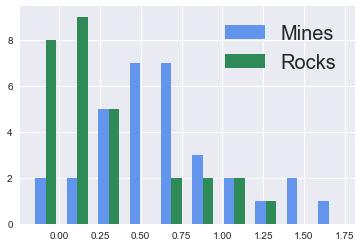

In [38]:
mines = list()
rocks = list()
actual = np.array(y_test)
for i in range(len(y_test)):
    if actual[i]:
        mines.append(testing_predictions[i])
    else:
        rocks.append(testing_predictions[i])
        
df_m = pd.DataFrame(mines)
df_r = pd.DataFrame(rocks)
fig, ax = plt.subplots()
a_heights, a_bins = np.histogram(df_m)
b_heights, b_bins = np.histogram(df_r, bins=a_bins)
width = (a_bins[1] - a_bins[0])/3
mines_bars = ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue')
rocks_bars = ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')
plt.legend([mines_bars,rocks_bars], ["Mines", "Rocks"], loc='upper right', prop={'size':20})


<h2>Trading off true positive rate and false positive rate</h2>

<h2>ROC: Receiver Order Characteristic</h2>
<li>An ROC curve shows the performance of a binary classifier as the threshold varies 
<li>It contrasts
<ul>
<li>False positive rate (FPR) Fall out/false alarm on the x-axis
<li>True Positive rate (TPR) Sensitivity/recall on the y-axis
</ul>
<li>Each (fpr,tpr) coordinate is calculated for each threshold value and a curve plotted
<li>An <span style="color:blue">area under the curve (auc)</span> is calculated. 
<li>AUC gives us an estimate of how stable our model is to changes in threshold values



<h2>Drawing the ROC Curve</h2>
<li>sklearn has a function roc_curve that does this for us

In [39]:
from sklearn.metrics import roc_curve, auc

<h4>Out-sample ROC curve</h4>

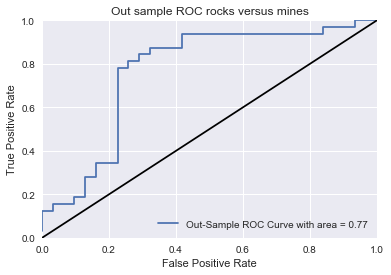

In [40]:
#training_predictions = model.predict(x_train)
#(fpr, tpr, thresholds) = roc_curve(y_train,training_predictions)

testing_predictions = model.predict(x_test)
(fpr, tpr, thresholds) = roc_curve(y_test,testing_predictions)

area = auc(fpr,tpr)
plt.clf() #Clear the current figure
plt.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

plt.plot([0, 1], [0, 1], 'k')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Out sample ROC rocks versus mines')
plt.legend(loc="lower right")
plt.show()

<h2>Precision vs. Recall</h2>
<li>Precision tells us how well we're discriminating within the positively identified  cases
<li>Recall tells us what proportion of actual positive cases we've identified as positive
<li>Obviously, we'd like both numbers to be close to 1!
<li>The precision-recall curve tells us how well we're doing on both factors for different threshold values
<li>We can also compute an <span style="color:blue">average precision (AP) metric</span>
<ul>
<li>AP computes a score at each threshold point
<li>Each score is the precision at that point multiplied by the change in recall from the previous threshold point
<li>These are then summed up to give a weighted average
<li>

Text(0.5,1,'2-class Precision-Recall curve: AP=0.74')

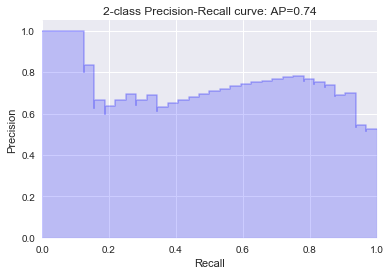

In [44]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

#precision, recall, thresholds = precision_recall_curve(y_train, training_predictions)
#average_precision = average_precision_score(y_train, training_predictions)


precision, recall, thresholds = precision_recall_curve(y_test, testing_predictions)
average_precision = average_precision_score(y_test, testing_predictions)

step_kwargs = ({'step' : 'post'})

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
# *  is used to unpack multiple arguments in list
# ** unpacks a dictionary argument

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

<h2>So, what threshold should we actually use?</h2>
<li>ROC curves and precision-recall curves give you a sense for how good your classifier is and how sensitive it is to changes in threshold


<h3>Example: Let's say</h3>
<li>Everything classified as a rock needs to be checked with a hand scanner at $200/scan</li> 
<li>Everything classified as a mine needs to be defused at \$1000 if it is a real mine or \$300 if it turns out to be a rock</li>



In [42]:
# this really should be a FOR loop

tn, fp, fn, tp = confusion_matrix(y_test,get_classification(testing_predictions,.1)).ravel()
cost1 = (tn+fn) * 200 + 1000 * tp + 300 * fp
tn, fp, fn, tp = confusion_matrix(y_test,get_classification(testing_predictions,.5)).ravel()
cost2 = (tn+fn) * 200 + 1000 * tp + 300 * fp
tn, fp, fn, tp = confusion_matrix(y_test,get_classification(testing_predictions,.9)).ravel()
cost3 = (tn+fn) * 200 + 1000 * tp + 300 * fp
print(cost1,cost2,cost3)

38700 28500 19400


<h3>Example: Let's say</h3>
<li>Everything classified as a rock will be assumed a rock and if wrong, will cost $5000 in injuries</li> 
<li>Everything classified as a mine will be left as is (no one will walk on it!)</li>


In [43]:
tn, fp, fn, tp = confusion_matrix(y_test,get_classification(testing_predictions,.1)).ravel()
cost1 = 5000 * fn
tn, fp, fn, tp = confusion_matrix(y_test,get_classification(testing_predictions,.5)).ravel()
cost2 = 5000 * fn
tn, fp, fn, tp = confusion_matrix(y_test,get_classification(testing_predictions,.9)).ravel()
cost3 = 5000 * fn
print(cost1,cost2,cost3)

10000 65000 120000


<h2>Bottom line. Depends on factors from your domain</h2>